In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(234)

In [28]:
students = 40
study_hours = np.random.randint(1, 10, students)
job_hours = np.random.randint(0, 15, students)
sleep_hours = np.random.randint(4, 9, students)
extracurricular = np.random.randint(0, 6, students)

exam_score = (40
              + 5*study_hours
              + 2*sleep_hours
              - 3*job_hours
              - 1*extracurricular
              + np.random.randint(-5,5,students))

df = pd.DataFrame({
    'Study Hours': study_hours,
    'Job Hours': job_hours,
    'Sleep Hours': sleep_hours,
    'Extracurricular hours': extracurricular,
    'Exam Score': exam_score
})

In [29]:
df.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular hours,Exam Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [30]:
corr_coefficients = df.corr()
corr_coefficients

,Study Hours,Job Hours,Sleep Hours,Extracurricular hours,Exam Score
Study Hours,1.000000,-0.136551,-0.006383,-0.114442,0.694048
Job Hours,-0.136551,1.000000,0.188992,0.209991,-0.782525
Sleep Hours,-0.006383,0.188992,1.000000,0.158029,-0.035653
Extracurricular hours,-0.114442,0.209991,0.158029,1.000000,-0.276837
Exam Score,0.694048,-0.782525,-0.035653,-0.276837,1.000000


In [31]:
df.columns

Index(['Study Hours', 'Job Hours', 'Sleep Hours', 'Extracurricular hours',
       'Exam Score'],
      dtype='object')

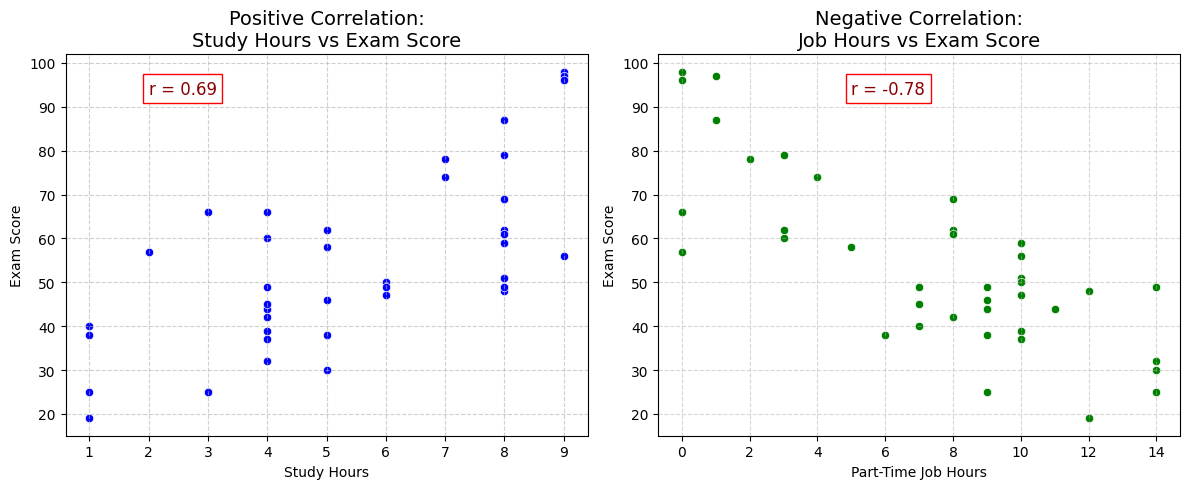

In [32]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='Study Hours', y='Exam Score', data=df, color='blue')
plt.title("Positive Correlation:\nStudy Hours vs Exam Score", fontsize=14)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.text(2, max(df["Exam Score"])-5, f"r = {corr_coefficients.loc['Study Hours', 'Exam Score']:.2f}",
         fontsize=12, color="darkred", bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)

plt.subplot(1,2,2)
sns.scatterplot(x='Job Hours', y='Exam Score', data=df, color='green')
plt.title("Negative Correlation:\nJob Hours vs Exam Score", fontsize=14)
plt.xlabel("Part-Time Job Hours")
plt.ylabel("Exam Score")
plt.text(5, max(df["Exam Score"])-5, f"r = {corr_coefficients.loc['Job Hours', 'Exam Score']:.2f}",
         fontsize=12, color="darkred", bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


```c
The Study Hours and Exam Score shows a strong positive correlation, which shows students that studied for long hours had a high score in their exam. Studying before exam impact the result of said student positively. 

The Job Hours and Exam score shows a strong negative correlation, which means job hours affects student perforrmance in exam. There was a strong correlation which impacted result negatively for student that have to work long job hours. Probably means lesser time to study for exam which impacted their exam performance.
```

In [33]:
# REGRESSION
df.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular hours,Exam Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [34]:
import statsmodels.api as sm

# Define variables for simple regression
X = df['Study Hours']
Y = df['Exam Score']

In [35]:
X = sm.add_constant(X)

In [36]:
X.head()

,const,Study Hours
0,1.0,9
1,1.0,5
2,1.0,2
3,1.0,4
4,1.0,8


In [48]:
# Fit model using OLS (Ordinary Least Squares)
model = sm.OLS(Y, X).fit()

In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam Score   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     35.32
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           6.82e-07
Time:                        14:21:55   Log-Likelihood:                -161.99
No. Observations:                  40   AIC:                             328.0
Df Residuals:                      38   BIC:                             331.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.6404      5.476      4.500      

C:\Users\NCC200\AppData\Local\Temp\ipykernel_10972\4201697477.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(2, max(df['Exam Score'])-5, f'Y = {model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)


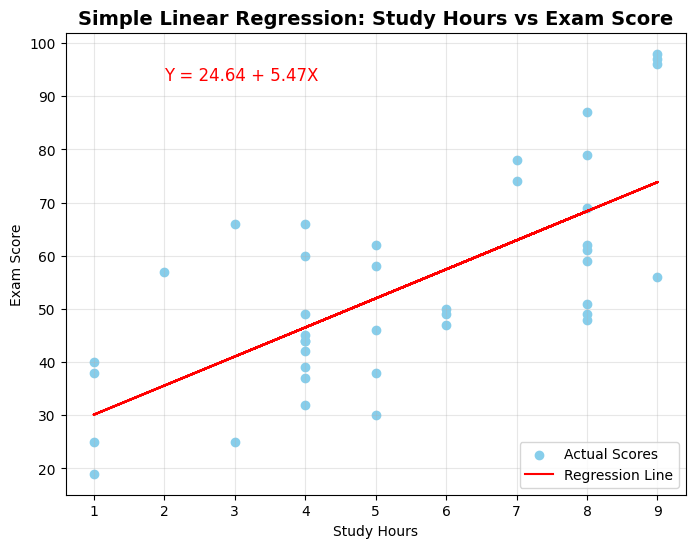

In [39]:
# lets have the regression plot using regression line and scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['Study Hours'], df['Exam Score'], color='skyblue', label='Actual Scores')
plt.plot(df['Study Hours'], model.predict(X), color='red', label='Regression Line')

# Annotate
plt.title('Simple Linear Regression: Study Hours vs Exam Score', fontsize=14, weight='bold')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.text(2, max(df['Exam Score'])-5, f'Y = {model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [51]:
predictions = model.predict(X)
predictions

0     73.845272
1     51.976436
2     35.574810
3     46.509227
4     68.378063
5     62.910854
6     46.509227
7     30.107601
8     46.509227
9     46.509227
10    41.042019
11    62.910854
12    73.845272
13    46.509227
14    68.378063
15    57.443645
16    68.378063
17    51.976436
18    30.107601
19    30.107601
20    68.378063
21    57.443645
22    68.378063
23    46.509227
24    46.509227
25    46.509227
26    46.509227
27    51.976436
28    51.976436
29    73.845272
30    57.443645
31    68.378063
32    41.042019
33    68.378063
34    51.976436
35    46.509227
36    73.845272
37    68.378063
38    68.378063
39    30.107601
dtype: float64

In [53]:
# Lets use our predicted score to check the errors
df['Predicted Exam Score'] = predictions
df['Squared Error'] = (df['Exam Score'] - df['Predicted Exam Score']) ** 2

# Show a few rows
df[['Study Hours', 'Exam Score', 'Predicted Exam Score', 'Squared Error']].head()


,Study Hours,Exam Score,Predicted Exam Score,Squared Error
0,9,56,73.845272,318.453719
1,5,46,51.976436,35.717790
2,2,57,35.574810,459.038779
3,4,37,46.509227,90.425406
4,8,69,68.378063,0.386806


In [55]:
X = df[['Study Hours', 'Job Hours', 'Sleep Hours', 'Extracurricular hours']]

In [56]:
X.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular hours
0,9,10,4,2
1,5,9,5,1
2,2,0,6,3
3,4,10,6,5
4,8,8,7,1


In [57]:
X = sm.add_constant(X)

In [58]:
X.head()

,const,Study Hours,Job Hours,Sleep Hours,Extracurricular hours
0,1.0,9,10,4,2
1,1.0,5,9,5,1
2,1.0,2,0,6,3
3,1.0,4,10,6,5
4,1.0,8,8,7,1


In [59]:
Y = df['Exam Score']

In [60]:
Y.head()

0    56
1    46
2    57
3    37
4    69
Name: Exam Score, dtype: int32

In [61]:
model = sm.OLS(Y, X).fit()

In [62]:
model.params

const                    44.790203
Study Hours               4.641188
Job Hours                -3.145561
Sleep Hours               1.573738
Extracurricular hours    -0.876619
dtype: float64

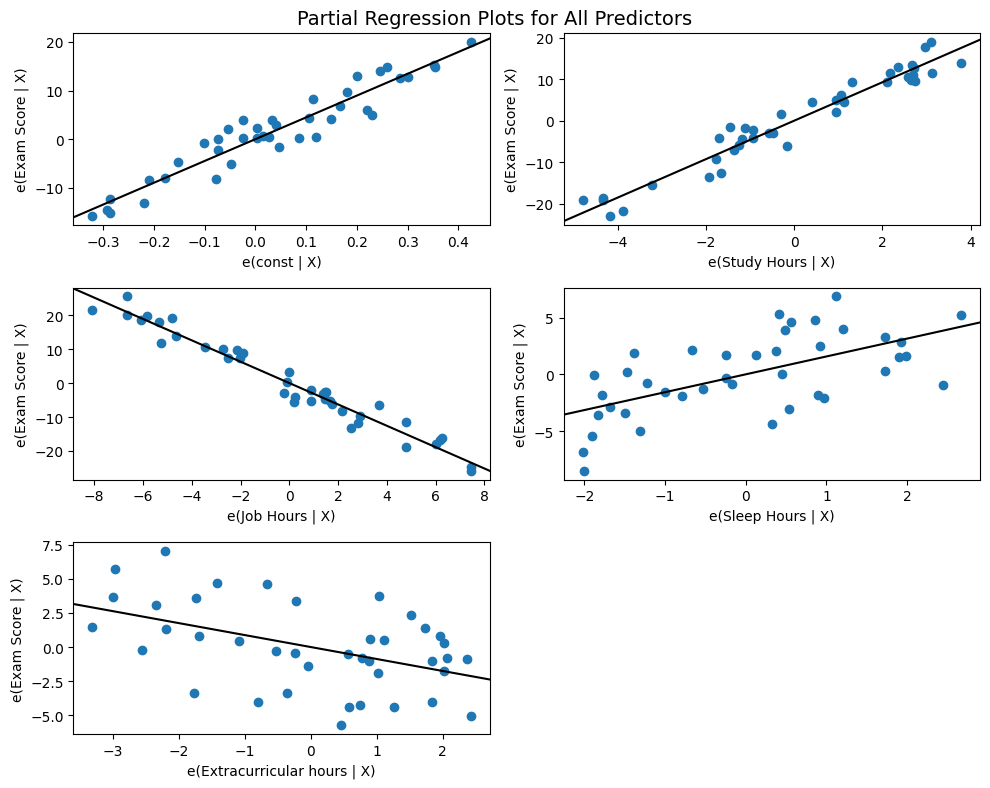

In [63]:
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.suptitle("Partial Regression Plots for All Predictors", fontsize=14)
plt.show()

In [64]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam Score   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     429.2
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           3.31e-29
Time:                        16:00:23   Log-Likelihood:                -96.874
No. Observations:                  40   AIC:                             203.7
Df Residuals:                      35   BIC:                             212.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    44.79